<a href="https://colab.research.google.com/github/Samuel-Njoroge/Stock_Market_Prediction_using_StackedLSTM/blob/main/Stock_Market_Prediction_and_Forecasting_using_StackedLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Prediction and Forecasting using Stacked LSTM.
IMPORTING LIBRARIES.

In [1]:
#Importing libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math


**LOADING THE DATASET.**

In [2]:
#Loading the dataset.
data = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
#A summary of the columns in the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [4]:
#Summary statistics of the dataset.
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


**RESETTING THE INDEX**

Resetting the index of the dataframe object to default(0) to generate a new DataFrame or Series with the index. 

In [5]:
#Reset the index of close column.
stock_data = data.reset_index()['Close']

**EXAMINING  THE SHAPE OF THE NEW DATAFRAME.**

The shape is a tuple that gives dimensions of the array. It is an arrangement of the number of dimensions in the array. 

In [6]:
#Examine the shape of the new dataframe.
stock_data.shape 

(2035,)

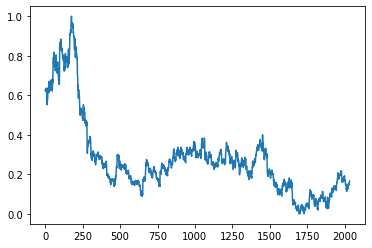

In [36]:
#A plot of the dataset 
plt.plot(stock_data)

In [8]:
#Preprocessing.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
stock_data = scaler.fit_transform(np.array(stock_data).reshape(-1,1))

In [9]:
print(stock_data)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


**SPLITTING THE DATASET**

The dataset contains  Time Series data so the division is based on the date.
Training data - 65%
Test data - 35%

In [10]:
#Splitting the dataset into Training data and Test data.
training_size = int(len(stock_data)*0.65)
test_size = len(stock_data) - training_size
train_data , test_data = stock_data[0:training_size,:],stock_data[training_size:len(stock_data),:1]

In [11]:
#The Training size and the Test size.
print(training_size, test_size)

1322 713


In [12]:
#Converting the array into a dataset matrix.
import numpy
def create_dataset(dataset , time_step = 1):
  dataX , dataY = [],[]
  for i in range(len(dataset) - time_step-1):
    a = dataset[i:(i+time_step) , 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step,0])
  return numpy.array(dataX) , numpy.array(dataY)


In [13]:
#Reshaping : X=t , t+1 , t+2 , t+3 , Y =t+4
time_step = 100
X_train , y_train = create_dataset(train_data , time_step)
X_test , ytest = create_dataset(test_data , time_step)

In [14]:
print(X_train)

[[0.62418301 0.62214052 0.62622549 ... 0.83455882 0.86213235 0.85273693]
 [0.62214052 0.62622549 0.63378268 ... 0.86213235 0.85273693 0.87111928]
 [0.62622549 0.63378268 0.62234477 ... 0.85273693 0.87111928 0.84497549]
 ...
 [0.34517974 0.31781046 0.33047386 ... 0.2816585  0.27001634 0.26531863]
 [0.31781046 0.33047386 0.32128268 ... 0.27001634 0.26531863 0.27389706]
 [0.33047386 0.32128268 0.34007353 ... 0.26531863 0.27389706 0.25347222]]


In [15]:
print(X_train.shape)
print(y_train.shape)

(1221, 100)
(1221,)


In [16]:
print(X_test.shape)
print(ytest.shape)

(612, 100)
(612,)


**CREATING AN LSTM.**

Long Short-Term Memory (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems.

In [17]:
#Reshape the input into a 3D array required for LSTM.
X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0] ,X_test.shape[1] , 1)

In [18]:
#Creating an LSTM Model.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

**LOSS FUNCTION.**

A loss function is a function that compares the target and predicted output values; measures how well the neural network models the training data.

TYPES.

1.Regression Loss Function.

2.Mean Squared Error - Measures how close a regression line is to a set of data points.

3.Mean Squared Logarithmic Error Loss.

4.Mean Absolute Error Loss.

5.Binary Classification Loss Function.

6.Binary Cross Entropy Loss.

7.Hinge Loss.

8.Multi-Class Classification Loss Function.


In [19]:
#Loss function.
model = Sequential()
model.add(LSTM(50 ,return_sequences =True, input_shape = (100,1)))
model.add(LSTM(50 ,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error' , optimizer = 'adam')

In [20]:
#The Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train,y_train ,validation_data=(X_test,ytest) , epochs=100 ,batch_size=64 , verbose =1)

Epoch 1/100
20/20 [==============================] - 20s 483ms/step - loss: 0.0294 - val_loss: 0.0041
Epoch 2/100
20/20 [==============================] - 4s 191ms/step - loss: 0.0031 - val_loss: 0.0015
Epoch 3/100
20/20 [==============================] - 3s 172ms/step - loss: 0.0018 - val_loss: 9.6892e-04
Epoch 4/100
20/20 [==============================] - 4s 188ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 5/100
20/20 [==============================] - 4s 188ms/step - loss: 0.0017 - val_loss: 8.6539e-04
Epoch 6/100
20/20 [==============================] - 4s 187ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 7/100
20/20 [==============================] - 4s 183ms/step - loss: 0.0014 - val_loss: 9.1829e-04
Epoch 8/100
20/20 [==============================] - 4s 177ms/step - loss: 0.0014 - val_loss: 8.4630e-04
Epoch 9/100
20/20 [==============================] - 4s 179ms/step - loss: 0.0014 - val_loss: 7.7822e-04
Epoch 10/100
20/20 [==============================] - 4s 177ms/step - 

In [22]:
#Prediction and performance metric.
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [23]:
#Transforming to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [24]:
#Calculating RMSE performance metric.
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train ,train_predict))

167.67603183891566

In [25]:
#Test Data RMSE
math.sqrt(mean_squared_error(ytest ,test_predict))

116.59896851665096

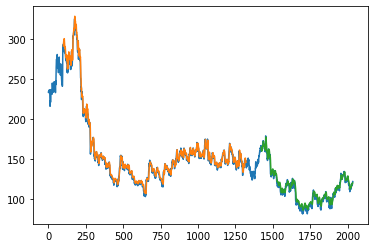

In [26]:
#Plotting 
#shift train prediction for plotting.
look_back =100
trainPredictionPlot = numpy.empty_like(stock_data)
trainPredictionPlot[:,:] = np.nan
trainPredictionPlot[look_back: len(train_predict)+look_back ,:] = train_predict

#Shift test predictions for plotting
testPredictPlot= numpy.empty_like(stock_data)
testPredictPlot[:,:] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(stock_data)-1,:] = test_predict

#Plotting baseline and Predictions.
plt.plot(scaler.inverse_transform(stock_data))
plt.plot(trainPredictionPlot)
plt.plot(testPredictPlot)
plt.show()




**PREDICTING THE FUTURE.**

In [27]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape


(1, 372)

In [28]:
#Converting into a list
temp_input = list(x_input)

In [29]:
#Prediction for the next 30 Days.
from numpy import array

lst_output = []
n_steps = 100
i =0 
while i <30:
  if(len(temp_input)>100):
    #Print temp_input
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input = x_input.reshape(1,-1)
    x_input = x_input.reshape((1,n_steps,1))
    #print x_input
    yhat = model.predict(x_input ,verbose = 0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input =temp_input[1:]
    #Print temp_input
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input = x_input.reshape((1,n_steps,1))
    yhat = model.predict(x_input , verbose = 0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1

print(lst_output)

ValueError: ignored

In [30]:
new_day = np.arange(1,101)
pred_day = np.arange(101 , 131)

In [ ]:
len(stock_data)

In [32]:
stock_data.reshape(1,-1)

array([[0.62418301, 0.62214052, 0.62622549, ..., 0.1621732 , 0.16319444,
        0.16584967]])

In [33]:
stock_data_one = stock_data.reshape(1,-1).tolist()
stock_data_one.extend(lst_output)

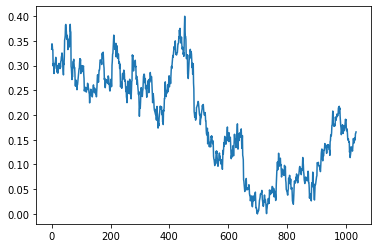

In [34]:
#Complete output
stock_data_one = stock_data.tolist()
stock_data_one.extend(lst_output)
plt.plot(stock_data_one[1000:])